**This is a sentiment analysis of IMDB data from Kaggle**  
https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format?resource=download

Import libraries and dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
data=pd.read_csv("Test.csv")
data.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


The file is organized into two columns: text and label. Text being the written sentiment and label being the binary representation of positive and negative.

Now, the next cell will visualize the data distribution:

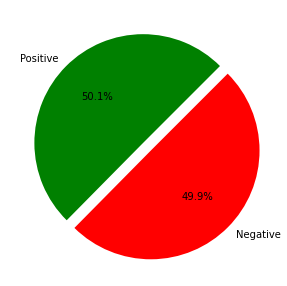

In [2]:
fig=plt.figure(figsize=(5,5))
colors=["green","red"]
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck, labels=["Positive","Negative"],
              autopct = '%1.1f%%',
              shadow = False,
              colors = colors,
              startangle = 45,
              explode=(0,0.1))

This returns a near even split on sentiment which is not indicative of much. Data cleaning to remove tags and modify emojis to be compatible and usable.

In [3]:
import re
def preprocessor(text):
    text=re.sub('<[^>]*>','',text)
    emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text=re.sub('[\W]+',' ',text.lower()) +\
        ' '.join(emojis).replace('-','')
    return text
data['text']=data['text'].apply(preprocessor)

In [4]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
    return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

Visualizing the positive and negative with a word cloud

[nltk_data] Downloading package stopwords to /home/wells/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


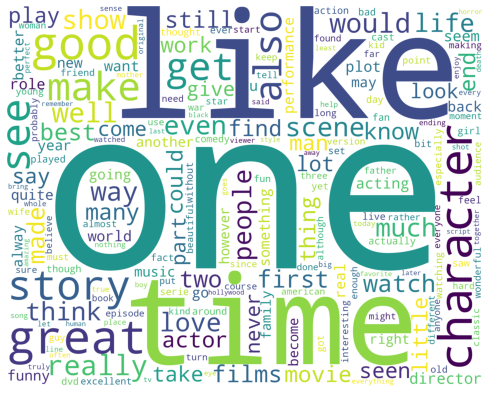

Negative words are as follows


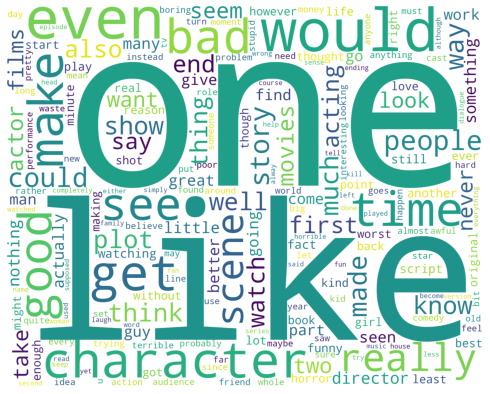

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

From this, the words like, one, and time are the predominant words selected to express sentiment in relation to movie ratings